In [ ]:
# Importing the required tools and libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
import cv2

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Loading the dataframe with 1000 image samples with label details
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Flood_Sample/Filtered_1000images_Preprocessed.csv')
df.head(5)

,Unnamed: 0,source,image_id,image_path,damage_severity,informative,humanitarian,disaster_types,event_name,tweet_id,tweet_text,image,IsFlood
0,0,CrisisMMD,910207417345908736_0,data/crisismmd/data_image/hurricane_irma/19_9_...,little_or_none,informative,infrastructure_and_utility_damage,hurricane,hurricane_irma,9.100000e+17,Irma: Naples Estates Watch Now Â·Î©Ã‘9https://...,data_image/hurricane_irma/19_9_2017/9102074173...,1
1,1,CrisisMMD,909863262371663872_0,data/crisismmd/data_image/hurricane_irma/18_9_...,severe,informative,infrastructure_and_utility_damage,flood,hurricane_irma,9.100000e+17,RT @jimaley: Amazing pix of Irma aftermath htt...,data_image/hurricane_irma/18_9_2017/9098632623...,1
2,2,CrisisMMD,908496398898925569_0,data/crisismmd/data_image/hurricane_harvey/15_...,mild,informative,infrastructure_and_utility_damage,hurricane,hurricane_harvey,9.080000e+17,"1/ This is Woodloch, a small town on the outsk...",data_image/hurricane_harvey/15_9_2017/90849639...,1
3,3,CrisisMMD,904993803911790592_0,data/crisismmd/data_image/hurricane_harvey/5_9...,mild,informative,infrastructure_and_utility_damage,hurricane,hurricane_harvey,9.050000e+17,Editorial: Harveyâ€™s terrible impact spotligh...,data_image/hurricane_harvey/5_9_2017/904993803...,1
4,4,CrisisMMD,910084561891098625_0,data/crisismmd/data_image/hurricane_irma/19_9_...,severe,informative,infrastructure_and_utility_damage,flood,hurricane_irma,9.100000e+17,"Hurricane Irma Released ""250 Million Gallons O...",data_image/hurricane_irma/19_9_2017/9100845618...,1


In [ ]:
df = df.sample(frac = 1)
df[600:800]

,Unnamed: 0,source,image_id,image_path,damage_severity,informative,humanitarian,disaster_types,event_name,tweet_id,tweet_text,image,IsFlood
88,88,CrisisMMD,910618362631225344_0,data/crisismmd/data_image/hurricane_maria/20_9...,mild,informative,infrastructure_and_utility_damage,hurricane,hurricane_maria,9.110000e+17,New post (Hurricane Maria clobbers Puerto Rico...,data_image/hurricane_maria/20_9_2017/910618362...,1
163,163,CrisisMMD,915313036214325248_0,data/crisismmd/data_image/hurricane_maria/3_10...,mild,informative,infrastructure_and_utility_damage,flood,hurricane_maria,9.150000e+17,Canâ€™t contact your friends and family in Pue...,data_image/hurricane_maria/3_10_2017/915313036...,1
218,218,CrisisMMD,904429119865282560_0,data/crisismmd/data_image/hurricane_harvey/3_9...,mild,informative,rescue_volunteering_or_donation_effort,hurricane,hurricane_harvey,9.040000e+17,"With a $20 million fund in his sights, J.J. Wa...",data_image/hurricane_harvey/3_9_2017/904429119...,1
255,255,CrisisMMD,870295153872908288_0,data/crisismmd/data_image/srilanka_floods/1_6_...,severe,informative,affected_injured_or_dead_people,flood,srilanka_floods,8.700000e+17,Sri Lanka President Maithripala Sirisena blame...,data_image/srilanka_floods/1_6_2017/8702951538...,1
814,814,CrisisMMD,909843903880335360_0,data/crisismmd/data_image/hurricane_irma/18_9_...,little_or_none,not_informative,not_humanitarian,not_disaster,hurricane_irma,9.100000e+17,The scum bags robbed from us when we were tryi...,data_image/hurricane_irma/18_9_2017/9098439038...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,270,CrisisMMD,913008996335878144_0,data/crisismmd/data_image/hurricane_maria/27_9...,severe,informative,infrastructure_and_utility_damage,hurricane,hurricane_maria,9.130000e+17,Trump boosts aid to Puerto Rico in the wake of...,data_image/hurricane_maria/27_9_2017/913008996...,1
808,808,CrisisMMD,927705955940425729_0,data/crisismmd/data_image/hurricane_maria/7_11...,little_or_none,not_informative,not_humanitarian,not_disaster,hurricane_maria,9.280000e+17,RT @FosterDogsNYC: #HappyHalloween from #Hurri...,data_image/hurricane_maria/7_11_2017/927705955...,0
597,597,CrisisMMD,908569872065429504_0,data/crisismmd/data_image/hurricane_harvey/15_...,little_or_none,not_informative,not_humanitarian,not_disaster,hurricane_harvey,9.090000e+17,Firefighter rescues Harvey victims asÃ‚ hi htt...,data_image/hurricane_harvey/15_9_2017/90856987...,0
171,171,CrisisMMD,910233174663458818_0,data/crisismmd/data_image/hurricane_irma/19_9_...,mild,informative,infrastructure_and_utility_damage,hurricane,hurricane_irma,9.100000e+17,Early expert opinion is that Hurricane Irma wi...,data_image/hurricane_irma/19_9_2017/9102331746...,1


In [ ]:
# items = os.listdir('/content/gdrive/MyDrive/Flood_Sample/')
items = df['image_id']
print (items)

860    910151430262153216_0
416    905454057334071296_0
342    905705134361120768_1
456    904224844044046337_0
764    871367180201283585_0
               ...         
55     904705739733782530_0
249    904593743189291008_0
960    904324002176532481_1
752    921567296820310017_0
959    907257101029974016_2
Name: image_id, Length: 1000, dtype: object


1    504
0    496
Name: IsFlood, dtype: int64


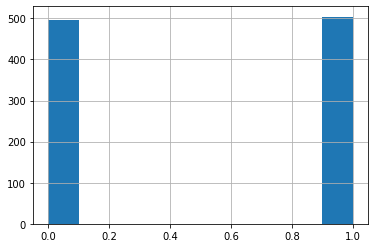

In [ ]:
print(df['IsFlood'].value_counts())
df['IsFlood'].hist()

In [ ]:
print(items)

860    910151430262153216_0
416    905454057334071296_0
342    905705134361120768_1
456    904224844044046337_0
764    871367180201283585_0
               ...         
55     904705739733782530_0
249    904593743189291008_0
960    904324002176532481_1
752    921567296820310017_0
959    907257101029974016_2
Name: image_id, Length: 1000, dtype: object


In [ ]:
items[0]

'910207417345908736_0'

In [ ]:
import cv2
import os
import numpy as np

In [ ]:
items[200]

'911511116844498944_0'

In [ ]:
images = []
for each_image in items:
  # each_image = items[5]
  # print(each_image)
  # if each_image.endswith(".jpg"):
  full_path = "/content/gdrive/MyDrive/Flood_Sample/" + each_image + '.jpg'
  # print(full_path)
  image = cv2.imread(full_path)
  # print(image)
  #display image
  from IPython.display import Image
  Image(full_path)  
  # loading and preparing the image
  # from keras.preprocessing.image import load_img
  from tensorflow.keras.utils import load_img
  # load an image from file
  image = load_img(full_path, target_size=(224, 224)) 
  #converting image to array
  # from keras.preprocessing.image import img_to_array
  from tensorflow.keras.utils import img_to_array
  # convert the image pixels to a numpy array
  image = img_to_array(image).astype(np.uint8)
  # print(image)
  images.append(image)

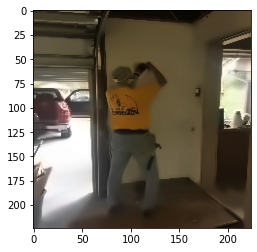

In [ ]:
type(image)

img = image.astype(np.uint8)
plt.imshow(img)

In [ ]:
np.array(images).shape

(1000, 224, 224, 3)

In [ ]:
# images[5]

In [ ]:
images_array = np.array(images)

In [ ]:
train_images = np.array(images_array)[:600,:]
validate_images = np.array(images_array)[600:800, :]
test_images = np.array(images_array)[800:, :]

In [ ]:
print('Train images shape:', train_images.shape)
print('Validate images shape:', validate_images.shape)
print('Test images shape:', test_images.shape)

Train images shape: (600, 224, 224, 3)
Validate images shape: (200, 224, 224, 3)
Test images shape: (200, 224, 224, 3)


In [ ]:
# labels_array = [[int(df['IsFlood'][x])] for x in range(len(df))]
labels_array = df['IsFlood']
# Check the shape of the labels_array

In [ ]:
labels_array = np.array(labels_array)
labels_array[600:800]

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0])

In [ ]:
train_labels = np.array(labels_array)[:600]
validate_labels = np.array(labels_array)[600:800]
test_labels = np.array(labels_array)[800:]

In [ ]:
validate_labels

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0])

In [ ]:
print('Train labels shape:', train_labels.shape)
print('Validate labels shape:', validate_labels.shape)
print('Test labels shape:', test_labels.shape)

Train labels shape: (600,)
Validate labels shape: (200,)
Test labels shape: (200,)


In [ ]:
CLASS_NAMES = ['0', '1']
# CLASS_NAMES = ['little_or_none', 'severe', 'mild']

In [ ]:
train_images.shape

(600, 224, 224, 3)

In [ ]:
len(train_images)

600

In [ ]:
# validation_images, validation_labels = train_images[:500], train_labels[:500]

In [ ]:
validate_labels

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0])

In [ ]:
# train_images, train_labels = train_images[500:], train_labels[500:]

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))


In [ ]:
train_ds.unique

<bound method DatasetV2.unique of <TensorSliceDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>>

In [ ]:
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [ ]:
validation_ds = tf.data.Dataset.from_tensor_slices((validate_images, validate_labels))

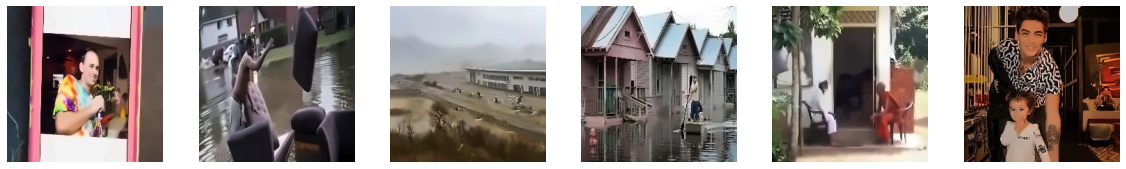

In [ ]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(6)):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(image)
    # plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [ ]:
def process_images(image, label):
    #Normalize image to have a mean 0 and standard deviation of 1
    # image = tf.image.per_image_standardization(image)
    #Resize images from  32x32 to 224x224
    # image = tf.image.resize(image, (224,224))
    return image, label

In [ ]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

Training data size: 600
Test data size: 200
Validation data size: 200


In [ ]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size = (11,11), strides = (4,4), activation = 'relu', \
                        input_shape = (224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (3,3), strides = (2,2)),
    keras.layers.Conv2D(filters=256, kernel_size = (5,5), strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (3,3), strides = (2,2)),
    keras.layers.Conv2D(filters=384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (3,3), strides = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation ='softmax')
])

In [ ]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['acc',f1_m, precision_m, recall_m])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
history = model.fit(train_ds,
          epochs=20,
          validation_data=validation_ds,
          validation_freq=1,
          callbacks=[tensorboard_cb])

Epoch 1/20
18/18 [==============================] - 11s 87ms/step - loss: 2.4143 - acc: 0.4184 - f1_m: 0.6227 - precision_m: 0.4919 - recall_m: 0.8721 - val_loss: 2.2648 - val_acc: 0.4844 - val_f1_m: 0.6754 - val_precision_m: 0.5156 - val_recall_m: 1.0000
Epoch 2/20
18/18 [==============================] - 1s 43ms/step - loss: 1.9151 - acc: 0.4913 - f1_m: 0.6587 - precision_m: 0.5036 - recall_m: 0.9737 - val_loss: 1.2632 - val_acc: 0.4792 - val_f1_m: 0.6755 - val_precision_m: 0.5183 - val_recall_m: 0.9902
Epoch 3/20
18/18 [==============================] - 1s 40ms/step - loss: 1.5763 - acc: 0.5330 - f1_m: 0.6554 - precision_m: 0.4999 - recall_m: 0.9877 - val_loss: 0.7411 - val_acc: 0.5312 - val_f1_m: 0.6089 - val_precision_m: 0.5049 - val_recall_m: 0.7943
Epoch 4/20
18/18 [==============================] - 1s 40ms/step - loss: 1.2403 - acc: 0.5694 - f1_m: 0.6627 - precision_m: 0.5043 - recall_m: 0.9855 - val_loss: 1.0729 - val_acc: 0.4844 - val_f1_m: 0.6537 - val_precision_m: 0.5077 - 

In [ ]:
# Evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(test_ds, verbose = 0)

In [ ]:
print("Accuracy:", round(accuracy,4))
print("Precision:", round(precision,4))
print("F1 score:", round(f1_score,4))
print("Loss:", round(loss,4))
print("Recall:", round(recall,4))

Accuracy: 0.599
Precision: 0.4869
F1 score: 0.645
Loss: 0.7138
Recall: 0.9896


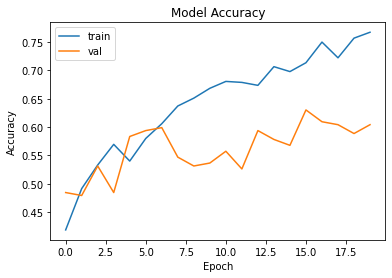

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

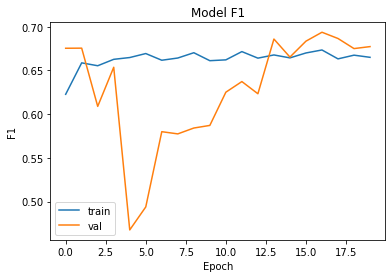

In [ ]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('Model F1')
plt.ylabel('F1')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

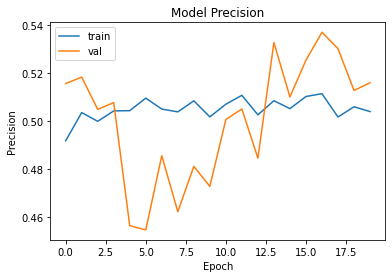

In [ ]:
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

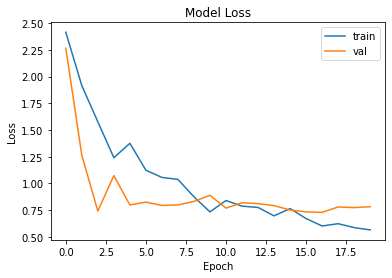

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

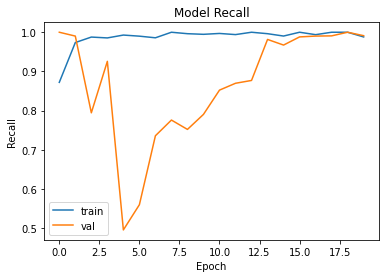

In [ ]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

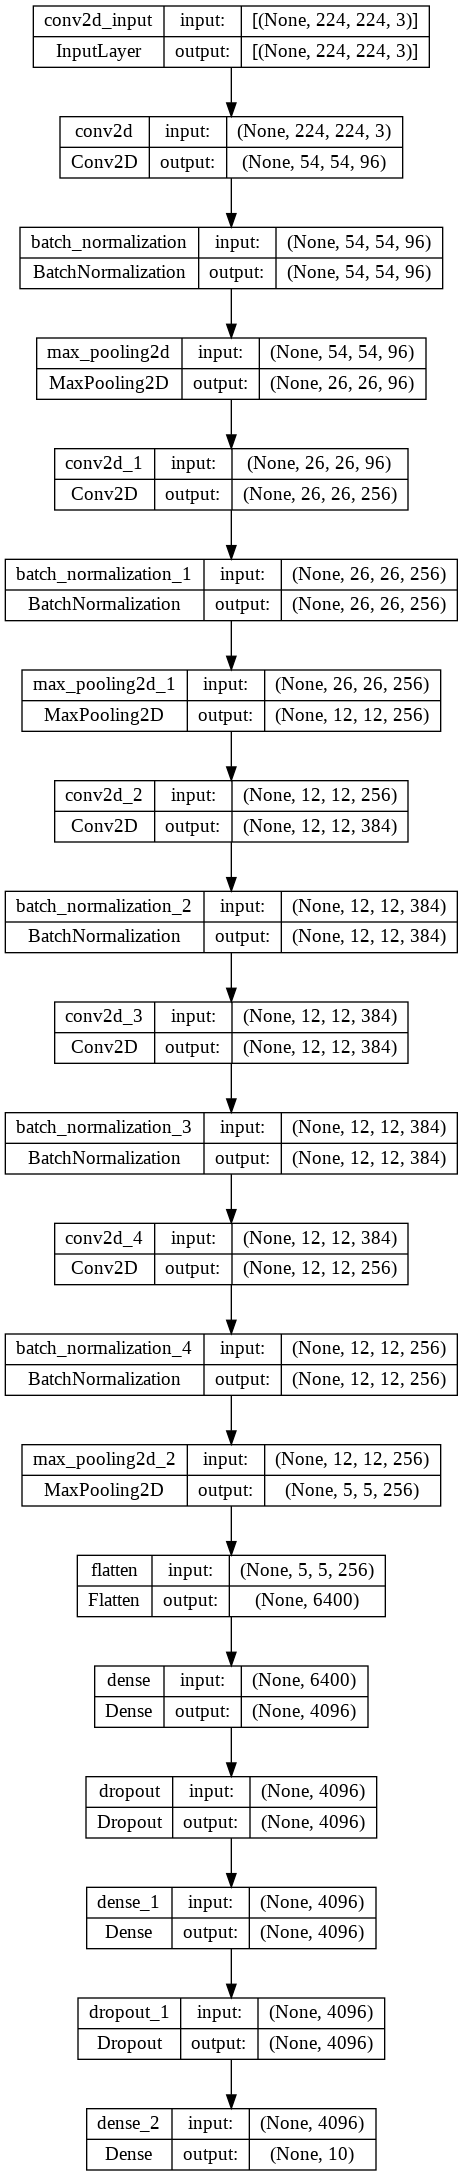

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)